# SAIL Radiosonde Data

This notebook is designed to investigate recent 2022 winter radiosonde data from SAIL launched from Gothic, CO over a variety of conditions

The `act` package is required for this notebook to download and easily visualize the data. Check out the documentation [here](https://arm-doe.github.io/ACT/index.html).

In [2]:
# packages to install if necessary
# !conda install -c conda-forge xarray
# !conda install -c conda-forge act

In [3]:
# Import packages to be used
import os

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xarray as xr
import act

In [4]:
# Personal access necessary for downloading from the ARM portal, need an account to due so
username = 'dlhogan@uw.edu'
token = '7f1c805e6ae94c21'
outpath = '/storage/dlhogan/sos/data'

Function to plot sondes

In [18]:
def plot_sonde(filepath,date,variable, limits, title, unit='$\degree$C'):
    # Apply date filter
    sonde_temp_profile = pd.read_csv(os.path.join(filepath,f'{date}_radiosonde.csv'))
        
    # Plot data
    fig, axs = plt.subplots(ncols=2, figsize=(10,5), tight_layout=True)
    axs[0].plot(sonde_temp_profile[variable],sonde_temp_profile['alt'])
    axs[0].set_xlim(limits[0],limits[1])
    axs[0].set_ylim(3000,10000)
    axs[0].set_xlabel(f'{variable.upper()} ({unit})');
    axs[0].set_ylabel('Altitude (m)');
    axs[0].set_title(f'{variable.upper()} with Altitude');

    axs[1].plot(sonde_temp_profile[variable],sonde_temp_profile['pres'])
    axs[1].set_xlim(limits[0],limits[1])
    axs[1].set_ylim(725,350)
    axs[1].set_xlabel(f'{variable.upper()} ({unit})');
    axs[1].set_ylabel('Pressure (mbar)');
    axs[1].set_title(f'{variable.upper()} with Pressure');

    fig.suptitle(f'{title} on {date}')
    return

Plots comparing temperature with height under different conditions

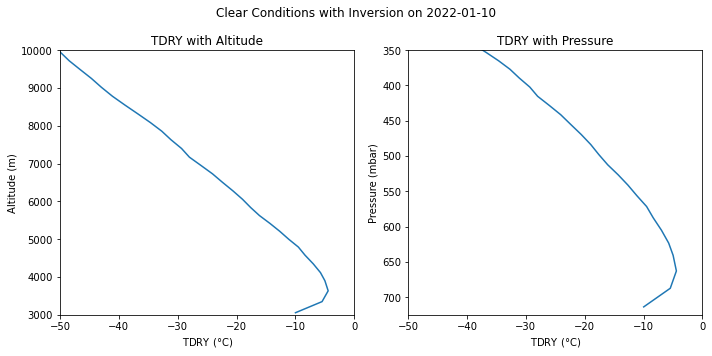

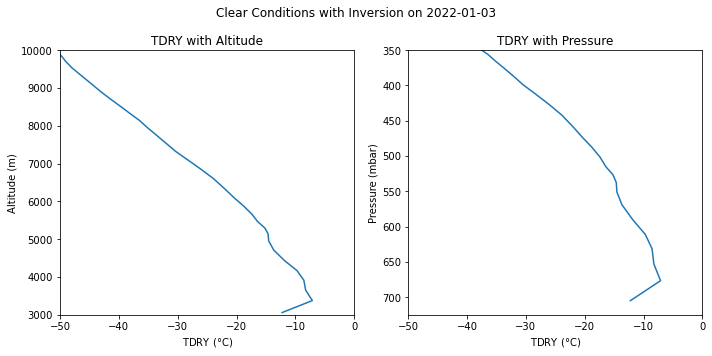

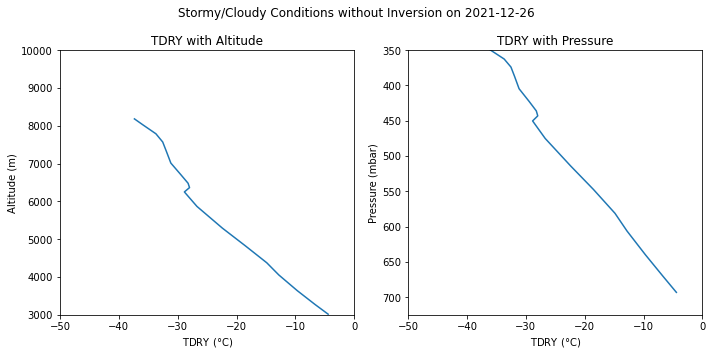

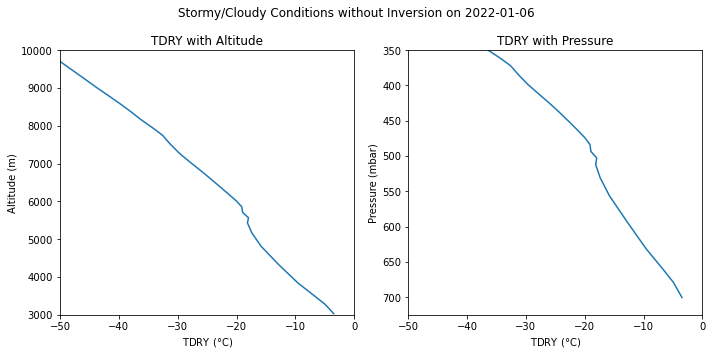

In [19]:
filepath='../data'
# Apply date filter
date = '2022-01-10'
plot_sonde(filepath, date, 'tdry', (-50,0), title='Clear Conditions with Inversion')

# Apply date filter
date = '2022-01-03'
plot_sonde(filepath, date, 'tdry', (-50,0), title='Clear Conditions with Inversion')

# Apply date filter
date = '2021-12-26'
plot_sonde(filepath, date, 'tdry', (-50,0), title='Stormy/Cloudy Conditions without Inversion')

# Apply date filter
date = '2022-01-06'
plot_sonde(filepath, date, 'tdry', (-50,0), title='Stormy/Cloudy Conditions without Inversion')

Plots comparing relative humidity with height during different conditions

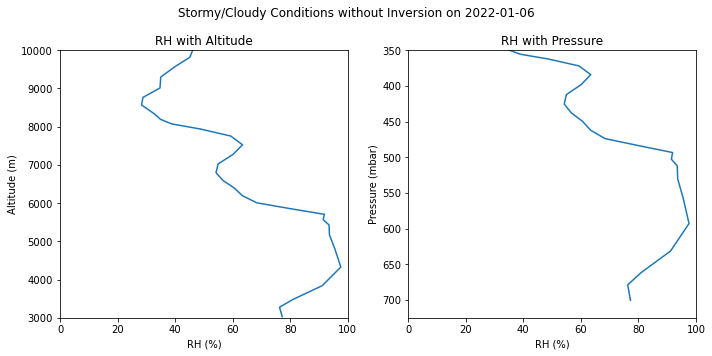

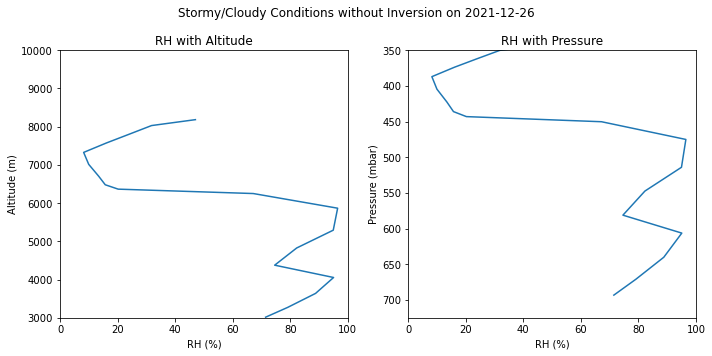

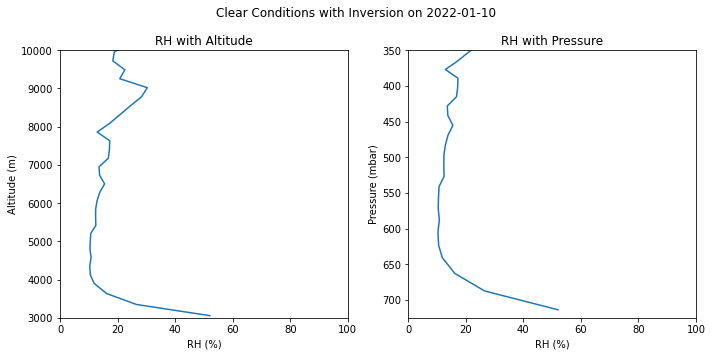

In [21]:
# Apply date filter
date = '2022-01-06'
plot_sonde(filepath, date, 'rh', (0,100), title='Stormy/Cloudy Conditions without Inversion', unit='%')

# Apply date filter
date = '2021-12-26'
plot_sonde(filepath, date, 'rh', (0,100), title='Stormy/Cloudy Conditions without Inversion', unit='%')

# Apply date filter
date = '2022-01-10'
plot_sonde(filepath, date, 'rh', (0,100), title='Clear Conditions with Inversion', unit='%')

Ceilometer plots showing cloud height with time.

In [22]:
ceil ='gucceilM1.b1'
ceil_dec21_ds = act.io.armfiles.read_netcdf(os.path.join(outpath,f'ceilometer/{ceil}.2021122*'))
ceil_jan22_ds = act.io.armfiles.read_netcdf(os.path.join(outpath,f'ceilometer/{ceil}.202201*'))
ceil_dec21_ds = act.corrections.ceil.correct_ceil(ceil_dec21_ds, -9999.)
ceil_jan22_ds = act.corrections.ceil.correct_ceil(ceil_jan22_ds, -9999.)

/home/dlhogan/.conda/envs/act_env/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in log10
  return func(*(_execute_task(a, cache) for a in args))


Text(0.5, 1.0, 'January 1-11 Backscatter')

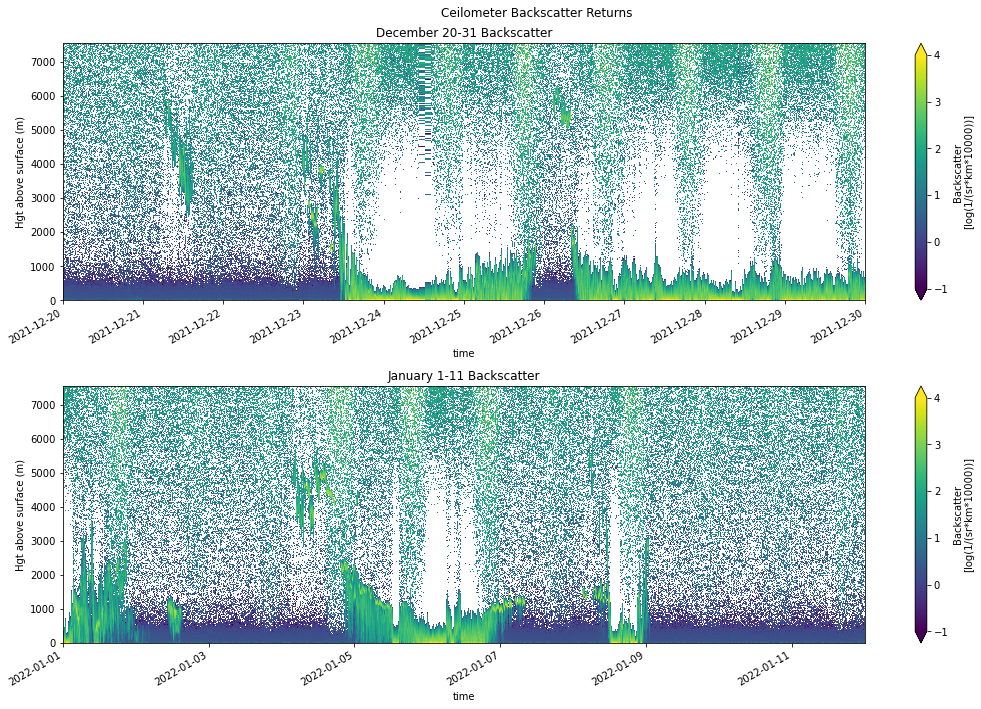

In [23]:
fig,axs = plt.subplots(nrows=2,figsize=(15, 10), tight_layout=True)
ceil_dec21_ds['backscatter'].plot(x='time', ax=axs[0], vmin=-1, vmax=4, cmap='viridis')
ceil_jan22_ds.sel(time=slice('2022-01-01','2022-01-11'))['backscatter'].plot(x='time', ax=axs[1], vmin=-1, vmax=4, cmap='viridis')

for ax in axs:
    ax.set_ylabel('Hgt above surface (m)')
fig.suptitle('Ceilometer Backscatter Returns')
axs[0].set_title('December 20-31 Backscatter')
axs[1].set_title('January 1-11 Backscatter')